Case study on Unsupervised Learning

Do the following in the wine dataset.

1. Read the dataset to the python environment.

2. Try out different clustering models in the wine dataset.

3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


In [1]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment

In [3]:
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

This dataset contains 178 rows and 13 columns

In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


This dataset contains 13 features of type integer ot floating point

In [10]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
# Checking for null values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values present

## 2. Try out different clustering models in the wine dataset.

### Applying KMeans Clustering method

In [13]:
# Finding the value of k using Elbow method
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


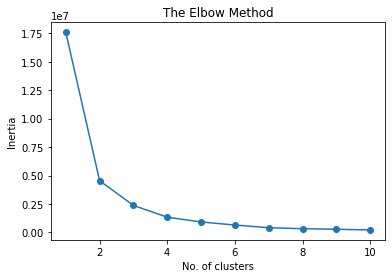

In [14]:
plt.plot(ks,inertia,'-o')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

Value of K=3

### Applying the model

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_KM = kmeans.fit_predict(data)
labels_KM

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

### Evaluating Model Efficiency

In [17]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,labels_KM)
print(silhouette_avg)

0.571138193786884


We can try to improve the model by standardisation and feature reduction

### Standardising the features to improve the efficiency of the model

In [18]:
# Normaliszing the features
from sklearn.preprocessing import Normalizer
norm=Normalizer()
data_n=norm.fit_transform(data)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


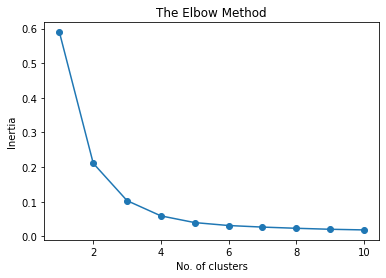

In [19]:
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data_n)
    inertia.append(model.inertia_)
plt.plot(ks,inertia,'-o')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

K=3

In [20]:
# Fitting the Model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_n = kmeans.fit_predict(data_n)
labels_n

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
# Checking the efficency of the model using evaluation metrics
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,labels_n)
print(silhouette_avg)

0.35748726929137725


Efficiency of the model has decreased highly. So its not advisable to do Normalization

In [22]:
# Standardising the features using Standard Scalar
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_sc=scale.fit_transform(data)

In [23]:
# Fitting the Model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_sc = kmeans.fit_predict(data_sc)
labels_sc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
# Checking the efficency of the model using evaluation metrics
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_sc,labels_sc)
print(silhouette_avg)

0.2848589191898987


Here also the efficiency of the model has decreased highly. So not advisable

### Applying Principal component Analysis for feature reduction

In [26]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 0.97)
pca.fit(data_sc)
x_pca = pca.transform(data_sc)
x_pca.shape

(178, 11)

Features has reduced from 13 to 11 after applying PCA

### Applying Model

In [27]:
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(x_pca)
    inertia.append(model.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


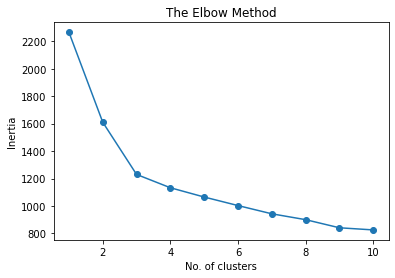

In [28]:
plt.plot(ks,inertia,'-o')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

From the above method we can choose the value of k as 3

In [29]:
# Fittin the Model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_km = kmeans.fit_predict(x_pca)
labels_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [30]:
# Evaluating the model efficiency
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_pca,labels_km)
print(silhouette_avg)

0.29195622482686934


Model efficiency has decreased. So its not advisable to go with PCA

Inference

Here KMeans method for the all the features with K=3 gave the most efficient model with efficiency score 0.57. Standard scaling and feature reduction decreased the efficiency of the model very much so its not advisable in this particular data set

## Hierarchical Clustering Method

### Using dendrogram to find the number of clusters

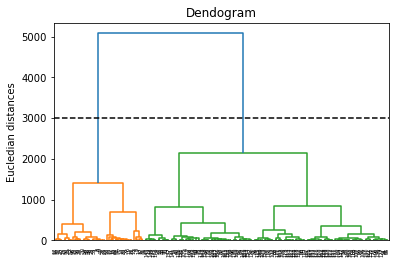

<Figure size 720x1080 with 0 Axes>

In [35]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.hlines(3000,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.figure(figsize=(10,15))
plt.show()

Number of clusters is chosen as K=2

### Fitting Agglomerative Clustering model

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_AHC=cluster.fit_predict(data)
labels_AHC

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### Evaluating the efficiency of the model

In [38]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,labels_AHC)
print(silhouette_avg)

0.6587292996216912


Efficiency of the model can be tried to increase using Standardisation of features or feature reduction methods

### Standardising the features

In [39]:
# Normalizing the features
from sklearn.preprocessing import Normalizer
norm=Normalizer()
data_n=norm.fit_transform(data)

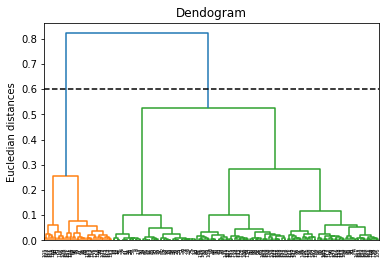

In [40]:
# Finding K using Dendrogram
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data_n, method='ward'))
plt.hlines(0.6,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

Number of clusters k=2

In [41]:
# Fitting the Model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_HC=cluster.fit_predict(data_n)
labels_HC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [42]:
# Evaluating the efficiency of the model
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_n,labels_HC)
print(silhouette_avg)

0.5365826498495794


Here the efficiency has decreased.

### Trying with Standard Scalar rather than normalizer

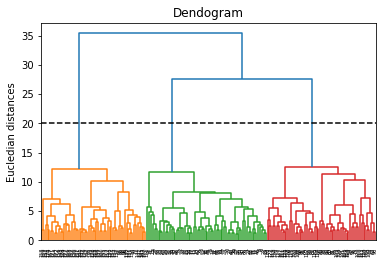

In [43]:
# Dendrogram of Standardised features
dendogram = sch.dendrogram(sch.linkage(data_sc, method='ward'))
plt.hlines(20,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

K=3

In [44]:
# Applying the Model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels_HC1=cluster.fit_predict(data_sc)
labels_HC1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [46]:
# Efficiency checking
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_sc,labels_HC1)
print(silhouette_avg)

0.2774439826952265


Efficiency has further decreased.

### Applying PCA for feature reduction

In [49]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 0.97)
pca.fit(data_sc)
x_pca1 = pca.transform(data_sc)
x_pca1.shape

(178, 11)

Features has decresed from 13 to 11

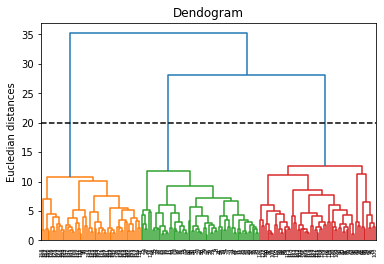

In [50]:
# Dendrogram
dendogram = sch.dendrogram(sch.linkage(x_pca1, method='ward'))
plt.hlines(20,0,5000,colors='black',linestyle='dashed')
plt.title('Dendogram')
plt.ylabel('Eucledian distances')
plt.show()

K=3

In [51]:
# Fitting HC model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels_HC2=cluster.fit_predict(x_pca1)
labels_HC2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [52]:
# Evaluating model efficiency
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_pca1,labels_HC2)
print(silhouette_avg)

0.28495044243291107


Here the efficiency has reduced.So here its not good to go for feature reduction

Inference

Here HC method for the all the features with K=2 gave the most efficient model with efficiency score 0.66.

Standard scaling and feature reduction decreased the efficiency of the model very much so its not advisable in this perticular data set

## Comparision of two models with a sample

In [53]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

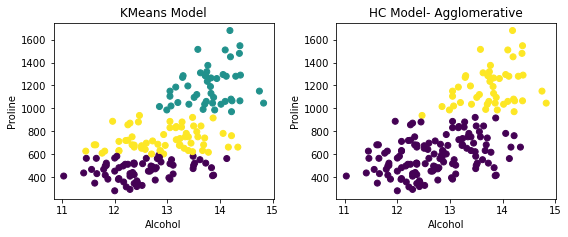

In [54]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
A=data['Alcohol']
P=data['Proline']
plt.scatter(A,P,c=labels_KM)
plt.title('KMeans Model')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.subplot(2,2,2)
A=data['Alcohol']
P=data['Proline']
plt.scatter(A,P,c=labels_AHC)
plt.title('HC Model- Agglomerative')
plt.xlabel('Alcohol')
plt.ylabel('Proline')

plt.tight_layout()

Insights

In both the modelling the clusters are grouped without overlapping

KMeans model gives 3 clusters with model efficiency 0.57. i.e, Wine quality can be divided to three groups.

HC model gives 2 clusters with model efficiency 0.66. i.e, Wine quality can be divided to two groups.

Here model efficiency of HC is greater than KMeans but both the models have overlapping clusters. So which model to be taken can be decided as per the client requirement


## Conclusion

##  Group Clustering By KMeans Model

In [57]:
data_n = pd.concat([data, pd.Series(labels_KM)], axis = 1)
data_n.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline','Quality']
data_n.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


### Group Clustering By HC Model

In [58]:
data_n = pd.concat([data, pd.Series(labels_AHC)], axis = 1)
data_n.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline','Quality']
data_n.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
